# <center><font color=maroon>CPE4903 Project: MNIST Handwritten Digit Classification</font> </center>

### In this mini-project, you will develop a CNN model for the handwritten digit classifier. 
* Use the companion notebook file, `CPE_4903_MNIST_NN`, as a reference and follow the steps to train and test the model. 
* <font color=red>Performance requirement: the accuracy on the test data needs to be better than 99% </font>
* You will save the parameters of the model at the end, which will be deployed on Raspberry Pi.

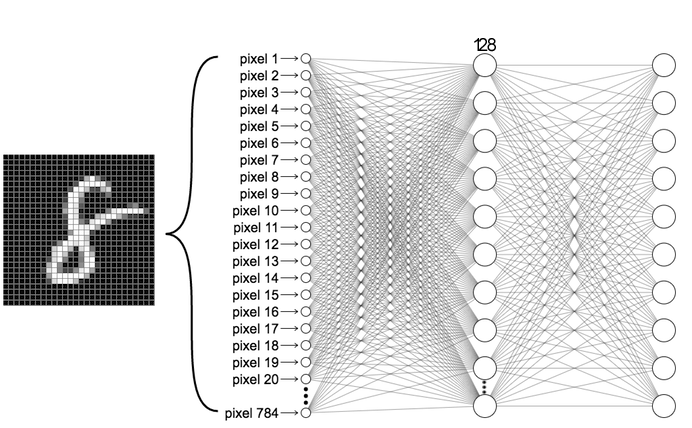

### Load tool modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import np_utils

import tensorflow as tf
from tensorflow import keras

#from keras.utils import np_utils
#from tensorflow.keras import utils
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
utils.to_categorical
from keras.utils import to_categorical



from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

### Load CNN models

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.datasets import mnist

### Load the dataset

In [3]:
from keras.datasets import mnist

### Show 10 input images

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


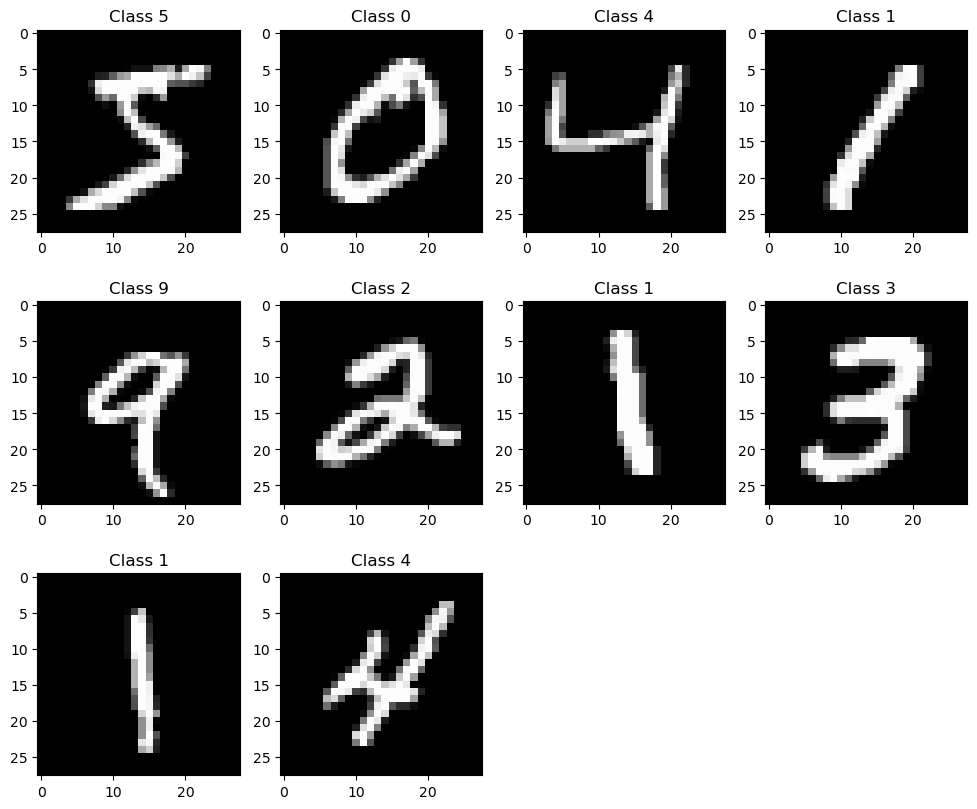

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

plt.figure(figsize=(12,10))

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[i]}")

# <font color=blue> Build the CNN Model</font>

## <font color=green>Pre-process the data:</font>
__1. Reshape $X$ and $Y$ to $(m, 28, 28, 1)$, where $m=$ # of samples in the dataset__

__2. Normalize the pixels for each image.__  

__3. Convert the output labels (y_train and y_test) to categorical data.__

In [5]:
#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('Shape of X_train =', X_train.shape)
print('Shape of X_test is =', X_test.shape)
print('Shape of y_train is =', y_train.shape)
print('Shape of y_test is =', y_test.shape)

Shape of X_train = (60000, 28, 28, 1)
Shape of X_test is = (10000, 28, 28, 1)
Shape of y_train is = (60000, 1)
Shape of y_test is = (10000, 1)


### Normalize the pixels

In [6]:
#normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Convert the output labels (y_train and y_test) to categorical data

In [7]:
#convert output labels
nb_classes = 10 # number of classification outputs 0..9
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

print('Shape of Y_train =', Y_train.shape)
print('Shape of Y_test =', Y_test.shape)

Shape of Y_train = (60000, 10)
Shape of Y_test = (10000, 10)


## <font color=green>Define the CNN model</font> 

__Use CONV, POOL and FC layers to construct your CNN model. You will train and test the model after this step.__

In [8]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

model_cnn.add(Conv2D(85, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(units = 120, activation = 'relu'))#from 100 to 120
model_cnn.add(Dense(units = 10, activation = 'softmax'))


### Print the model summary that shows the output shape and # of parameters for each layer.

In [9]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 85)        24565     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 85)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2125)              0         
                                                                 
 dense (Dense)               (None, 120)               2

## <font color=green>Train the CNN Model</font>

In [15]:
import timeit
start_time = timeit.default_timer()
#start time----------------------------
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model_cnn.fit(X_train, Y_train, epochs=12, batch_size=64, validation_split=0.2, verbose=1)

#end time------------------------------
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print(f"Total training time: {elapsed_time:.2f} seconds")

Epoch 1/12
750/750 [==============================] - 15s 19ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0695 - val_accuracy: 0.9878
Epoch 2/12
750/750 [==============================] - 16s 21ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0518 - val_accuracy: 0.9907
Epoch 3/12
750/750 [==============================] - 16s 22ms/step - loss: 9.1559e-04 - accuracy: 0.9998 - val_loss: 0.0521 - val_accuracy: 0.9908
Epoch 4/12
750/750 [==============================] - 16s 22ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0607 - val_accuracy: 0.9871
Epoch 5/12
750/750 [==============================] - 16s 21ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0537 - val_accuracy: 0.9908
Epoch 6/12
750/750 [==============================] - 16s 21ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0533 - val_accuracy: 0.9910
Epoch 7/12
750/750 [==============================] - 16s 22ms/step - loss: 5.4056e-04 - accuracy: 0.9999 - val_loss: 0.0551 - val_a

### Compare Loss and Accuracy Performance for train and validation data

#### Plot the loss data, for both train and validation data

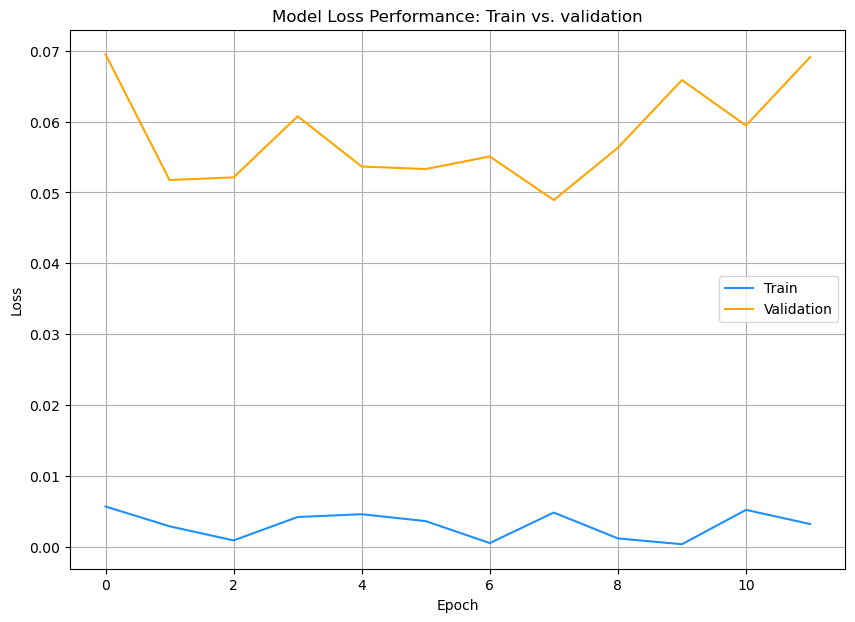

In [16]:
J = history.history['loss']  # Loss data for Training 
J_val = history.history['val_loss']

plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()


#### Plot the accuracy data, for both train and validation data

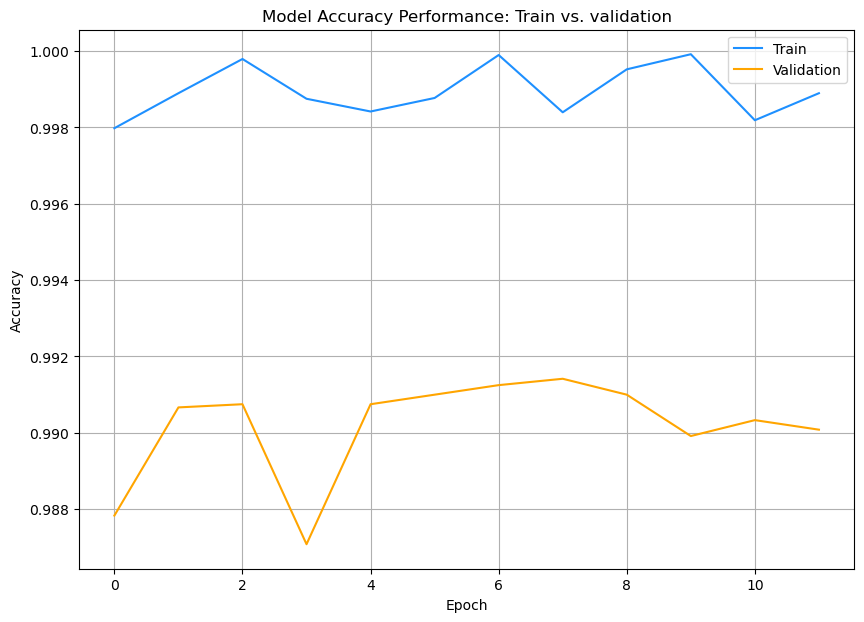

In [17]:
accu = history.history['accuracy']  # Loss data for Training 
accu_val = history.history['val_accuracy']

plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

## <font color=green>Test the CNN Model</font>

In [18]:
score = model_cnn.evaluate(X_test, Y_test, verbose=1)
Y_pred = model_cnn.predict(X_test)



313/313 [==============================] - 1s 5ms/step


### Print the final loss and accuracy of the test data

In [19]:
print("loss:",score[0])
print("accuracy:",score[1]*100,"%")

loss: 0.05067168176174164
accuracy: 99.1599977016449 %


### Save the CNN model parameters

In [20]:
model_cnn.save('MNIST_Michaela_Model1.h5')

C:\Apps\conda\envs\tf2\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## <font color=green>Conclusion</font>

### You will add remarks on:
__1. Number of parameters for the three models: MLP, baseline CNN, and your CNN__

__2. Performance (accuracy) comparison__

__3. Anything else you tried and observed while traing the model__

In [21]:
"""
I re-ran the MLP & CNN Baseline Python file myself.
Here is a list to compare:

Number of Parameters:
MLP: 669,706
Baseline CNN: 542,230
Modified CNN: 281,215 
comparsions: my model was able to perform better despite havig less parameters

Accuracy Comparison:
MLP: 97.7%
Baseline CNN:  98.5%
Modified CNN: 99.1%
comparsions: my model achieved higher accuracy

Training Time:
MLP: 55 seconds
Baseline CNN: 97seconds
Modified CNN: 258.47 seconds
comparsions: my model took longer to train, this can be contributed to my changes - i.e. # of epochs

attempted strategies/observations:
Initially increased epochs, but did not achieve the desired accuracy (0.99).
Tried increasing units in one of the dense layers.
Successfully improved model performance by adding more filters.
I could potentially increase batch size (appropriately though, to make sure to avoid overfitting)
saw  that changingthe number of filters (or convolutional kernels) by too much can lead to lower accuracy!!!!

Surpassed the 0.99 accuracy threshold, outperforming both baseline and MLP.
"""

'\nI re-ran the MLP & CNN Baseline Python file myself.\nHere is a list to compare:\n\nNumber of Parameters:\nMLP: 669,706\nBaseline CNN: 542,230\nModified CNN: 281,215 \ncomparsions: my model was able to perform better despite havig less parameters\n\nAccuracy Comparison:\nMLP: 97.7%\nBaseline CNN:  98.5%\nModified CNN: 99.1%\ncomparsions: my model achieved higher accuracy\n\nTraining Time:\nMLP: 55 seconds\nBaseline CNN: 97seconds\nModified CNN: 258.47 seconds\ncomparsions: my model took longer to train, this can be contributed to my changes - i.e. # of epochs\n\nattempted strategies/observations:\nInitially increased epochs, but did not achieve the desired accuracy (0.99).\nTried increasing units in one of the dense layers.\nSuccessfully improved model performance by adding more filters.\nI could potentially increase batch size (appropriately though, to make sure to avoid overfitting)\nsaw  that changingthe number of filters (or convolutional kernels) by too much can lead to lower ac

## <center><font color=maroon>Remember to turn in both the notebook and the pdf version.</font></center>